In [40]:
# Imports
from scapy.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# cargar el dataset preprocesado
df = pd.read_csv('archivo_completo_limpio.csv', sep=',', encoding='utf-8')

In [42]:
# separar el dataset en datos y etiquetas
x = df.drop(['Label'], axis=1)
y = df['Label']

In [43]:
# dividir el dataset en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

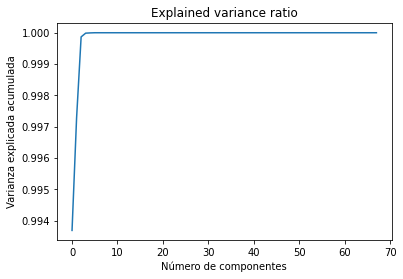

In [44]:
# fit and graph the explained variance ratio
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

In [45]:
no_components = 10

In [46]:
# aplicando PCA
pca = PCA(n_components=no_components)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [47]:
# convertir los datos a un dataframe
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [48]:
# check shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5568, 10)
(1392, 10)
(5568,)
(1392,)


El número óptimo de vecinos es 1


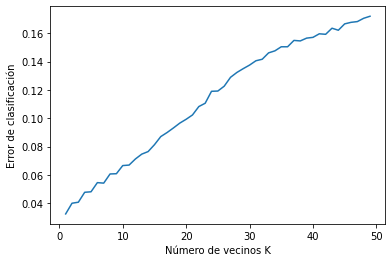

In [49]:
# creando lista de numero de vecinos a probar, de 1 a 50, de 1 en 1
neighbors = list(range(1, 50, 1))

# lista vacia que contenda los valores de accuracy para cada k en neighbors
cv_scores = []

# iteracion sobre todos los valores de neighbors para encontrar el mejor valor de k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# calculando el error medio cuadratico
MSE = [1 - x for x in cv_scores]

# asignando el mejor valor de k (con el menor error medio cuadratico)
optimal_k = neighbors[MSE.index(min(MSE))]
print("El número óptimo de vecinos es %d" % optimal_k)

# graficando el error medio cuadratico para cada k
plt.plot(neighbors, MSE)
plt.xlabel('Número de vecinos K')
plt.ylabel('Error de clasificación')
plt.show()

In [50]:
# Creando modelo KNN
KNN_classifier = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=-1)

In [51]:
# entrenando el modelo
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [52]:
# prediciendo el modelo
y_pred = KNN_classifier.predict(x_test)

In [53]:
# evaluando el modelo
print("Precisión del modelo KNN: ", KNN_classifier.score(x_test, y_test))
print("Matriz de confusión: \n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación: \n", classification_report(y_test, y_pred))

Precisión del modelo KNN:  0.9655172413793104
Matriz de confusión: 
 [[342   2   4   6]
 [  2 336   0   8]
 [  4   2 346   5]
 [  6   6   3 320]]
Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       354
           1       0.97      0.97      0.97       346
           2       0.98      0.97      0.97       357
           3       0.94      0.96      0.95       335

    accuracy                           0.97      1392
   macro avg       0.97      0.97      0.97      1392
weighted avg       0.97      0.97      0.97      1392

Exactitud del modelo:  0.9655172413793104
